# Explore offset vector

We want to know what the offset vector is capturing.  Theoretically it should be capturing the "essence of gene A" since it is defined by taking the samples with the highest expression of gene A and the lowest expression of gene A.

We want to test if this offset vector is capturing genes in group A and B

In [34]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

randomState = 123
from numpy.random import seed
seed(randomState)

In [35]:
# Load data
base_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
analysis_name = "sim_AB_2775_300_v2"
offset_gene_file = os.path.join(os.path.dirname(os.getcwd()), "data", analysis_name, "offset_gene_space.txt")
offset_vae_file = os.path.join(os.path.dirname(os.getcwd()), "encoded", analysis_name, "offset_latent_space_vae.txt")
A_file = os.path.join(base_dir, analysis_name, "geneSetA.txt")
B_file = os.path.join(base_dir, analysis_name, "geneSetB.txt")
weight_file = os.path.join(os.path.dirname(os.getcwd()), "data", analysis_name, "VAE_weight_matrix.txt")

In [36]:
# Read gene space offset
offset_gene_space = pd.read_table(offset_gene_file, header=0, index_col=0)
offset_gene_space

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0,0.048716,0.29774,0.26768,0.045651,0.02613,0.000452,-0.087915,0.015366,0.032408,0.09323,...,0.020266,0.056221,0.059724,0.020424,0.022496,-0.086384,-0.020905,0.021258,0.086268,0.093674


In [37]:
# Read VAE space offset
offset_vae_space = pd.read_table(offset_vae_file, header=0, index_col=0)
offset_vae_space

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.21778,-0.29499,-1.1781,0.54693,1.1309,1.5641,-1.7873,-0.17815,1.0093,0.2959,...,-2.7089,0.41333,0.11264,0.056392,2.9155,-0.45113,0.11076,-1.27,-0.73142,-1.9786


In [38]:
# Read genes in set A
geneSetA = pd.read_table(A_file, header=0, index_col=0)
geneSetA_ls = [l[0] for l in geneSetA.values.tolist()]
geneSetA_set = set(geneSetA_ls)

In [39]:
# Read genes in set B
geneSetB = pd.read_table(B_file, header=0, index_col=0)
geneSetB_ls = [l[0] for l in geneSetB.values.tolist()]
geneSetB_set = set(geneSetB_ls)

In [40]:
# Read weight matrix
weight = pd.read_table(weight_file, header=0, index_col=0).T
weight.head(5)

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
PA0001,-0.109896,-0.046397,-0.074332,-0.147623,-0.001468,-0.144918,-0.082134,-0.025183,-0.032311,-0.066211,...,-0.069226,-0.100556,0.027667,-0.103827,0.012406,-0.080507,-0.081776,-0.119806,-0.058431,-0.052509
PA0002,-0.246034,-0.291839,-0.312141,-0.160919,-0.081482,0.099776,-0.260427,-0.091375,-0.048770,-0.187572,...,-0.381651,-0.206640,-0.150470,-0.108064,-0.068341,-0.169337,-0.291553,-0.219857,-0.213785,-0.347230
PA0003,-0.034835,-0.178960,-0.045592,-0.132694,0.053346,-0.045186,-0.110322,-0.075096,-0.068044,-0.003200,...,-0.152220,-0.220926,-0.048476,-0.119541,-0.185043,-0.079093,-0.124860,-0.130549,-0.041711,-0.109421
PA0004,-0.041675,0.076071,-0.029738,-0.071658,-0.020806,-0.025592,-0.053239,-0.095967,-0.014828,-0.147332,...,0.019170,-0.072496,-0.040608,0.010228,0.003787,-0.054657,-0.021753,-0.045891,-0.085524,-0.100793
PA0005,-0.011299,-0.013832,0.064513,0.027427,0.024888,0.045149,0.021256,0.028361,-0.035507,0.060045,...,0.010586,-0.029618,0.017413,-0.061491,-0.045682,0.008379,0.074103,0.058450,-0.052197,-0.008725


## Explore gene space offset

1.  What genes are most highly weighted?
2.  What percentage of these genes are in gene set A and B?

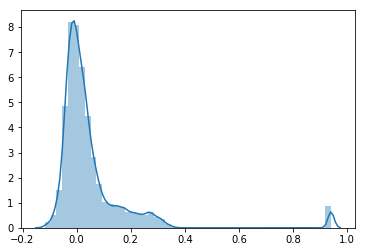

In [41]:
# Distribution of weights in offset vector
sns.distplot(offset_gene_space)

In [42]:
# Get gene ids with the highest weight from the offset vector
percentile = 95
threshold = np.percentile(offset_gene_space, percentile)
print("Threshold cutoff is {}".format(threshold))
highest_genes = offset_gene_space.T[offset_gene_space.T[0] > threshold].index

Threshold cutoff is 0.2661179999999996


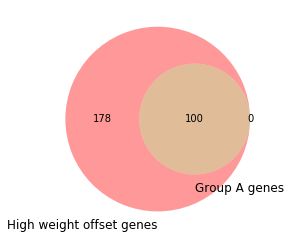

In [43]:
# Compare the overlap of genes in set A and highest weighted genes in offset
venn2([set(highest_genes), geneSetA_set], set_labels = ('High weight offset genes', 'Group A genes'))
plt.show()

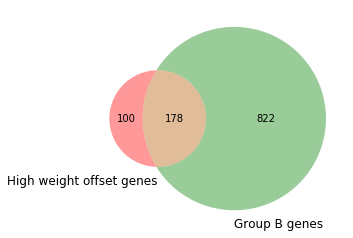

In [44]:
# Compare the overlap of genes in set B and highest weighted genes in offset
venn2([set(highest_genes), geneSetB_set], set_labels = ('High weight offset genes', 'Group B genes'))
plt.show()

## Explore latent space (VAE) offset
1.  Which feature has the highest value?
2.  Are genes in set A and B highly weighted 

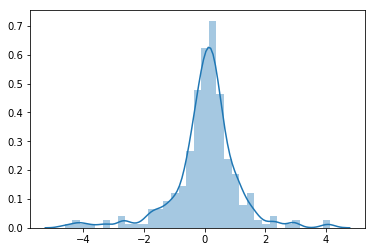

In [45]:
# Distribution of weights in offset vector
sns.distplot(offset_vae_space)

In [64]:
# Get latent feature with the max and min value
max_feature = offset_vae_space.T.idxmax()[0]
min_feature = offset_vae_space.T.idxmin()[0]
print("Max feature is {} and min feature is {}".format(max_feature, min_feature))

Max feature is 158 and min feature is 118


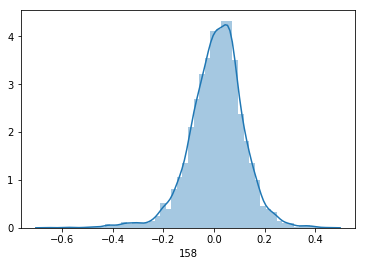

In [14]:
# Get gene weights for max latent feature
genes_max_feature = weight[int(max_feature)]
sns.distplot(genes_max_feature)

In [15]:
# Get gene ids with the highest positive weight from the max feature selected
percentile = 95
threshold = np.percentile(genes_max_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
highest_genes = genes_max_feature[genes_max_feature > threshold].index

Threshold cutoff is 0.17025277316570273


In [16]:
# Get gene ids with the highest negative weight from the max feature selected
percentile = 5
threshold = np.percentile(genes_max_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
lowest_genes = genes_max_feature[genes_max_feature < threshold].index

Threshold cutoff is -0.16365019381046295


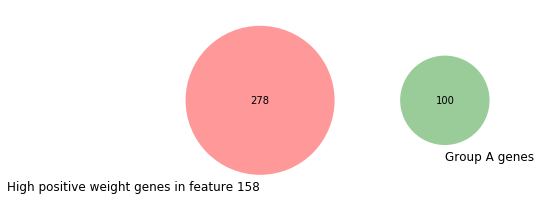

In [17]:
# Compare the overlap of genes in set A and highest positive weighted genes in the max feature
venn2([set(highest_genes), geneSetA_set], set_labels = ('High positive weight genes in feature {}'.format(max_feature), 'Group A genes'))
plt.show()

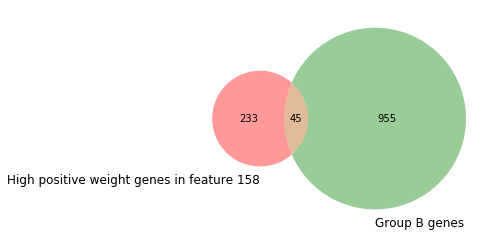

In [18]:
# Compare the overlap of genes in set B and highest positive weighted genes in the max feature
venn2([set(highest_genes), geneSetB_set], set_labels = ('High positive weight genes in feature {}'.format(max_feature), 'Group B genes'))
plt.show()

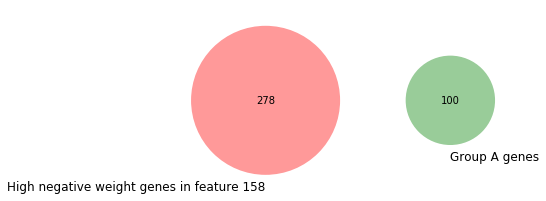

In [28]:
# Compare the overlap of genes in set A and highest negative weighted genes in the max feature
venn2([set(lowest_genes), geneSetA_set], set_labels = ('High negative weight genes in feature {}'.format(max_feature), 'Group A genes'))
plt.show()

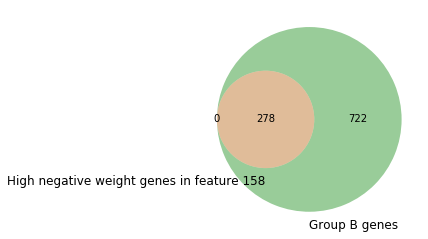

In [29]:
# Compare the overlap of genes in set B and highest negative weighted genes in the max feature
venn2([set(lowest_genes), geneSetB_set], set_labels = ('High negative weight genes in feature {}'.format(max_feature), 'Group B genes'))
plt.show()

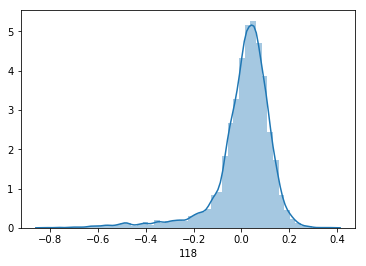

In [21]:
# Get gene weights for min latent feature
genes_min_feature = weight[int(min_feature)]
sns.distplot(genes_min_feature)

In [22]:
# Get gene ids with the highest positive weight from the min feature selected
percentile = 95
threshold = np.percentile(genes_min_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
highest_genes = genes_min_feature[genes_min_feature > threshold].index

Threshold cutoff is 0.14844369590282433


In [23]:
# Get gene ids with the highest negative weight from the min feature selected
percentile = 5
threshold = np.percentile(genes_min_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
lowest_genes = genes_min_feature[genes_min_feature < threshold].index

Threshold cutoff is -0.2155961960554123


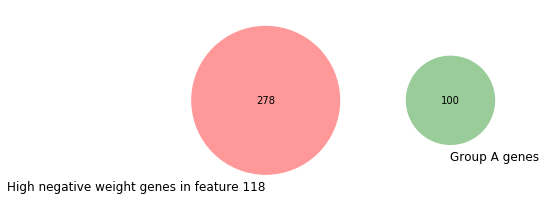

In [33]:
# Compare the overlap of genes in set A and highest positive weighted genes in the min feature
venn2([set(highest_genes), geneSetA_set], set_labels = ('High positive weight genes in feature {}'.format(min_feature), 'Group A genes'))
plt.show()

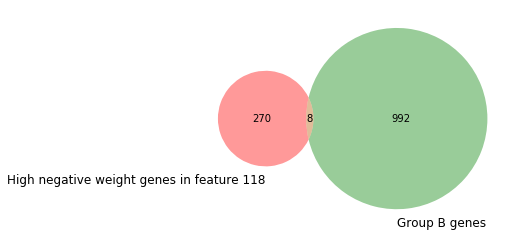

In [32]:
# Compare the overlap of genes in set B and highest positive weighted genes in the min feature
venn2([set(highest_genes), geneSetB_set], set_labels = ('High positive weight genes in feature {}'.format(min_feature), 'Group B genes'))
plt.show()

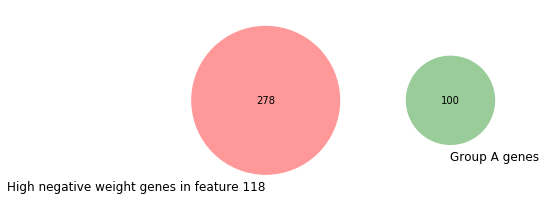

In [30]:
# Compare the overlap of genes in set A and highest negative weighted genes in the min feature
venn2([set(lowest_genes), geneSetA_set], set_labels = ('High negative weight genes in feature {}'.format(min_feature), 'Group A genes'))
plt.show()

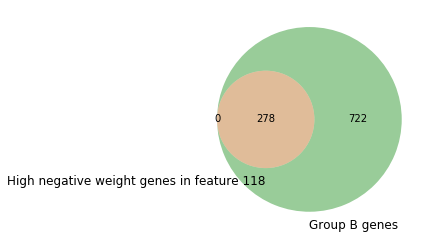

In [31]:
# Compare the overlap of genes in set B and highest negative weighted genes in the min feature
venn2([set(lowest_genes), geneSetB_set], set_labels = ('High negative weight genes in feature {}'.format(min_feature), 'Group B genes'))
plt.show()

Observation:

Notice that the overlap of the high weight genes in the min features and max feature are very similar -- why is this?